In [1]:
#importing necessary python packages
import pandas as pd
import numpy as np
import os
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from lifelines.utils.sklearn_adapter import sklearn_adapter
from lifelines import CoxPHFitter
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn import datasets, linear_model
from scipy.integrate import simps
from sklearn import metrics
from math import sqrt

In [2]:
os.chdir('C:\\Users\\U0033207PC\\Desktop\\LUAD FIREHOSE LEGACY DATABASE')#setting the right directory

In [3]:
# Importing the dataset
dt = pd.read_excel('FLUX.xlsx')

In [4]:
font = {'family': 'arial',
         'size': 14,
        }

In [5]:
dc = "Overall Survival (Months)"; 
ec = "Patient\'s Vital Status"

dt_ = dt.drop('HUG0_SYMBOL', axis=1)

y = dt_.pop(dc).values
z1 = dt_.pop(ec).values
X = dt_

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, z1_train, z1_test = train_test_split(X, y, z1, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, z1_train, z1_val = train_test_split(X_train, y_train, z1_train, test_size=0.2, random_state=0)

In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_val = sc_X.transform(X_val)

In [8]:
# Create a random forest Regressor
rgr = RandomForestRegressor(n_estimators=100, random_state=0)

In [9]:
# Train the Regressor
rgr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [10]:
# Print the name and importance of each feature
for feature in zip(X.columns, rgr.feature_importances_):
    print(feature)

('3DSPHR', 6.212971499234472e-05)
('3HBCOAHLm', 5.683124389599334e-05)
('ABTArm', 0.0009799833562910115)
('ABTD', 9.422332307001701e-05)
('ACACT1r', 0.0003047536828168186)
('ACACT1rm', 0.0003098667932163683)
('ACACT1x', 0.00036339949179422566)
('ACOAD9m', 8.986963305902044e-05)
('ACOAO7p', 1.0545761892967974e-05)
('ACOATA', 4.761996615764545e-06)
('ACONT', 0.00014347409819196515)
('ACONTm', 0.0005288664088122655)
('ADK1', 0.00018633163779844877)
('ADK1m', 0.002650503982807605)
('ADK3', 0.0014296759950717392)
('ADK3m', 0.0017123615530781255)
('ADKd', 0.0003746309368666097)
('AICART', 0.00015831724196216677)
('AKGDm', 0.0009991856484336014)
('AKR1C41', 0.0007575601529459786)
('AKR1C42', 4.344110709943801e-06)
('ALAR', 0.0003357530654377709)
('ALATA_L', 0.0004456365051215138)
('ALCD1', 0.00014340666786342797)
('ALDD21', 2.253898594518261e-05)
('ALOX52', 7.832769192070144e-06)
('AMACR2p', 8.03099173581509e-05)
('AMPDA', 0.002567554139802183)
('APAT2rm', 0.00010378801907914651)
('ARTPLM3', 

('H2Ot', 0.0005460329950346027)
('H2Oter', 0.002936311798604933)
('H2Otg', 0.00012613807410618807)
('H2Otm', 0.0004024582449339332)
('H2Otp', 0.00013408791175840463)
('HCO3_CLt', 0.00011061562322858065)
('HDCAter', 2.0473624854952786e-05)
('HDCEAtr', 0.00012289808090244593)
('HDD2COAtx', 0.0007792795964592915)
('HISt4', 0.0005256434249828293)
('HISTAtu', 0.0003258651608427383)
('HIStiDF', 0.0003957104252211006)
('HIStN1', 0.00022459786905323274)
('HMGCOAtm', 0.0007155366378377418)
('HMGCOAtx', 5.81488163364725e-06)
('HOMt4', 2.08974786046521e-05)
('Htg', 3.4831083513268735e-05)
('Htr', 0.00016986951519820846)
('Htx', 0.0007734572040442927)
('HYXNt', 3.7237815675117486e-05)
('IDPtn', 8.291645666247406e-05)
('ILEt5m', 0.0010419686849269369)
('ILEtec', 1.4154446127440785e-05)
('INSt', 0.0001475859600255207)
('INSTt2r', 3.592448001925134e-05)
('INSTt4', 0.00033409070755465353)
('IPDPtx', 0.0010887803534920036)
('It', 5.296083134268703e-05)
('ITPtn', 0.00029466758952423214)
('KCC2t', 9.4382

('EX_tmndnc(e)', 0.0005935976657069228)
('EX_trp_L(e)', 0.00024541269467597395)
('EX_tsul(e)', 0.00012934067626483485)
('EX_ttdca(e)', 0.00011888769559150036)
('EX_tyr_L(e)', 0.0009213001824668449)
('EX_ura(e)', 3.639618309866122e-05)
('EX_urate(e)', 0.0021369468480354485)
('EX_urea(e)', 0.001003610509037867)
('EX_uri(e)', 0.000625009025385754)
('EX_utp(e)', 0.0)
('EX_vacc(e)', 8.427155450076116e-07)
('EX_val_L(e)', 0.0004123864703467343)
('EX_xylt(e)', 4.6732505245638695e-05)
('EX_ahdt(e)', 4.813884284503927e-06)
('EX_ctp(e)', 5.6481110273741985e-06)
('EX_dgmp(e)', 9.752679921674881e-05)
('EX_dgtp(e)', 0.00013091489850401206)
('EX_dha(e)', 2.9866352811641923e-05)
('EX_dhap(e)', 3.1386407820032584e-06)
('EX_dtmp(e)', 4.891236550599244e-06)
('EX_dttp(e)', 8.753216190819807e-07)
('EX_fald(e)', 6.837107177144939e-05)
('EX_HC00229(e)', 0.001123060216061409)
('EX_HC00250(e)', 1.676594334804772e-05)
('EX_HC01104(e)', 2.9782734689396728e-06)
('EX_HC01361(e)', 0.00022099998890869797)
('EX_HC01

In [11]:
#Select the best features from the regressor
sfm = SelectFromModel(rgr)

In [12]:
# Train the Regressor
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [13]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

ABTArm
ACONTm
ADK1m
ADK3
ADK3m
AKGDm
AKR1C41
AMPDA
ASPTA
ASPTAm
CATm
CATp
CYSGLTH
CYTK13
CYTK2
CYTK3
CYTK5
CYTK6
CYTK7
CYTK8
D3AIBTm
DESAT18_6
DURIPP
EBP1r
ECOAH12m
FACOAL161
FACOAL226
FAOXC180x
FAOXC200180x
FOLR2
FUMm
GACMTRc
GALT
GAPD
GGNG
GLUDxm
GULNDer
H2CO3D
H2CO3Dm
HMGCOASi
HPYRRy
ICDHyrm
ILETA
LDH_L
LPS2e
MDH
MDHm
MTHFC
MTHFD2
MTHFDm
NDPK1
NDPK2
NDPK3
NDPK4
NDPK5n
NDPK7
NDPK9
PCHOLPr_hs
PEPCKm
PGI
PGK
PGM
PUNP1
PUNP2
PUNP3
PUNP4
PUNP7
PYK
RNDR1
RNDR4
SARDHm
SBTR
SUCD1m
TALA
TMDK1m
TMDPP
UMPK
UMPK4
UMPK5
UMPK7
VACCCPT2
VALTA
r0010
r0021
r0074
r0130
r0153
r0160
r0165
r0224
r0226
r0280
r0321
r0330
r0345
r0384
r0390
r0408
r0409
r0431
r0445
r0472
r0475
r0512
r0514
r0556
r0560
r0595
r0616
r0617
r0620
r0648
r0649
r0697
r0792
r1109
r1156
r1380
r1392
r1418
RE0453C
RE0453M
RE0579C
BAAT5x
RE2638C
RE2888E
RE2954C
RE3347C
FAOXC22C20x
FAOXC5C5OHm
DTMPKm
MTHFR3
2HBt2
ACACt2m
ACRNtm
ACt2m
ACt2r
ADEt
AKGt4_3
ALACYSNaEx
ALADGLYexR
ALAGLNexR
AMETr
ARGtm
ASNtm
ATPS4m
ATPtm
BILIRUBtr
BTNt2
CHOLtu
CI

In [14]:
sfm.get_support().sum()

442

In [15]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_val = sfm.transform(X_val)
X_important_test = sfm.transform(X_test)

In [16]:
conc1 = np.vstack(X_important_train)
conc2 = np.vstack(X_important_test)
conc3 = np.vstack(X_important_val)

X_important_train = pd.DataFrame(conc1, columns=['ABTArm','ACONTm','ADK1m','ADK3','ADK3m','AKGDm','AKR1C41','AMPDA','ASPTA','ASPTAm','CATm','CATp','CYSGLTH','CYTK13','CYTK2','CYTK3','CYTK5','CYTK6','CYTK7','CYTK8','D3AIBTm','DESAT18_6','DURIPP','EBP1r','ECOAH12m','FACOAL161','FACOAL226','FAOXC180x','FAOXC200180x','FOLR2','FUMm','GACMTRc','GALT','GAPD','GGNG','GLUDxm','GULNDer','H2CO3D','H2CO3Dm','HMGCOASi','HPYRRy','ICDHyrm','ILETA','LDH_L','LPS2e','MDH','MDHm','MTHFC','MTHFD2','MTHFDm','NDPK1','NDPK2','NDPK3','NDPK4','NDPK5n','NDPK7','NDPK9','PCHOLPr_hs','PEPCKm','PGI','PGK','PGM','PUNP1','PUNP2','PUNP3','PUNP4','PUNP7','PYK','RNDR1','RNDR4','SARDHm','SBTR','SUCD1m','TALA','TMDK1m','TMDPP','UMPK','UMPK4','UMPK5','UMPK7','VACCCPT2','VALTA','r0010','r0021','r0074','r0130','r0153','r0160','r0165','r0224','r0226','r0280','r0321','r0330','r0345','r0384','r0390','r0408','r0409','r0431','r0445','r0472','r0475','r0512','r0514','r0556','r0560','r0595','r0616','r0617','r0620','r0648','r0649','r0697','r0792','r1109','r1156','r1380','r1392','r1418','RE0453C','RE0453M','RE0579C','BAAT5x','RE2638C','RE2888E','RE2954C','RE3347C','FAOXC22C20x','FAOXC5C5OHm','DTMPKm','MTHFR3','2HBt2','ACACt2m','ACRNtm','ACt2m','ACt2r','ADEt','AKGt4_3','ALACYSNaEx','ALADGLYexR','ALAGLNexR','AMETr','ARGtm','ASNtm','ATPS4m','ATPtm','BILIRUBtr','BTNt2','CHOLtu','CITt4_2','CO2tp','COAtr','CRNCARtp','CRNtuNa','CYOR_u10m','CYTDt','DALAt2r','DATPtn','DGSNt','DHFtm','FADH2tru','FADtru','FATP9t','FOLt2','FRDPtc','FRUt4','GALt1r','GALt4','GLCt2_2','GLNALANaEx','GLNTHRNaEx','GLYt2r','GSNt','H2O2tp','H2Ot','H2Oter','HDD2COAtx','HISt4','HMGCOAtm','Htx','ILEt5m','IPDPtx','LEUKTRD4t','LEUtec','L_LACt2r','MALSO3tm','MALtm','MEOHt2','NADPHtru','NH4t3r','NKCCt','O2tm','ORNt3m','PHEtec','PIt2m','PIt7','PIter','PYRt2m','PYRt2r','SERGLYexR','SRTNt6_2_r','SRTNtu','TAURtcx','THD1m','THMDt4','THYMDtm','THYMt','URAt','URIt','r0819','r0821','r0822','r0830','r0835','r0838','r0840','r0913','r0941','r0942','r0946','r0947','r0990','r0992','r0997','r1027','r1043','r1045','r1088','r1291','r1464','r1493','r1559','r1562','r1563','r1585','r1587','r1589','r1590','r1594','r1596','r1598','r1599','r1604','r1606','r1609','r1615','r1627','r1639','r1641','r1656','r1659','r1661','r1664','r1702','r1706','r1708','r1710','r1715','r1825','r1827','r1828','r1830','r1831','r1832','r1835','r1846','r1866','r1867','r1890','r1919','r1923','r1929','r1934','r1935','r1944','r1949','r1969','r1975','r1981','r1984','r1995','r2003','r2012','r2015','r2017','r2020','r2024','r2080','r2082','r2083','r2085','r2087','r2088','r2089','r2091','r2094','r2100','r2103','r2107','r2109','r2110','r2111','r2113','r2116','r2118','r2120','r2121','r2123','r2125','r2126','r2128','r2129','r2139','r2142','r2145','r2148','r2154','r2180','r2193','r2195','r2203','r2204','r2205','r2219','r2250','r2309','r2313','r2324','r2354','r2356','r2358','r2371','r2372','r2373','r2375','r2378','r2380','r2382','r2386','r2403','r2405','r2433','r2438','r2521','r2532','INSTt4_2','PIt8','PIt9','C2tcx','ASNATB0tc','CYSATB0tc','FOLTle','GLYSNAT5tc','ILEATB0tc','PROIMINOtc','SERATB0tc','THRPHELAT2tc','VALLAT1tc','3HCO3_NAt','5MTHFt2le','CRNrtx','GSNt5le','PPItm','Q10H2e','THMDt5le','q10h2tc','q10tm','AICARte','DM_taur(c)','EX_abt(e)','EX_ac(e)','EX_acac(e)','EX_arg_L(e)','EX_ascb_L(e)','EX_biocyt(e)','EX_btn(e)','EX_creat(e)','EX_cyan(e)','EX_cys_L(e)','EX_dgsn(e)','EX_din(e)','EX_gal(e)','EX_gln_L(e)','EX_glu_L(e)','EX_glyc(e)','EX_gsn(e)','EX_h2o(e)','EX_hco3(e)','EX_hdcea(e)','EX_lac_D(e)','EX_lac_L(e)','EX_mag_hs(e)','EX_orn(e)','EX_pro_L(e)','EX_ser_L(e)','EX_thymd(e)','EX_tmndnc(e)','EX_tyr_L(e)','EX_urate(e)','EX_urea(e)','EX_uri(e)','EX_HC00229(e)','EX_HC01610(e)','EX_HC01700(e)','EX_HC02160(e)','EX_so3(e)','EX_ppi(e)','EX_HC00955(e)','EX_HC02207(e)','EX_23cump(e)','EX_CE5798(e)','EX_CE4633(e)','EX_bglc(e)','EX_gum(e)','EX_psyl(e)','EX_q10(e)','EX_q10h2(e)','EX_3mob(e)','EX_glyc3p(e)','biomass_other','ADNCNT3tc','FOLOATPtc','GLUB0AT3tc','GLYB0AT3tc','H2OGLYAQPt','METB0AT2tc','THMDt2r','URIt2r','VALB0AT2tc','3ISPVStep','AM1ALCShr','AM1CSAtep','CSAtd','DHGLZtev','EX_am1alcs(e)','EX_am1csa(e)','EX_glz(e)','FVStu','GLZtd','TMDOATPtsc','TMDOATthc'
                                                ])
X_important_test = pd.DataFrame(conc2, columns=['ABTArm','ACONTm','ADK1m','ADK3','ADK3m','AKGDm','AKR1C41','AMPDA','ASPTA','ASPTAm','CATm','CATp','CYSGLTH','CYTK13','CYTK2','CYTK3','CYTK5','CYTK6','CYTK7','CYTK8','D3AIBTm','DESAT18_6','DURIPP','EBP1r','ECOAH12m','FACOAL161','FACOAL226','FAOXC180x','FAOXC200180x','FOLR2','FUMm','GACMTRc','GALT','GAPD','GGNG','GLUDxm','GULNDer','H2CO3D','H2CO3Dm','HMGCOASi','HPYRRy','ICDHyrm','ILETA','LDH_L','LPS2e','MDH','MDHm','MTHFC','MTHFD2','MTHFDm','NDPK1','NDPK2','NDPK3','NDPK4','NDPK5n','NDPK7','NDPK9','PCHOLPr_hs','PEPCKm','PGI','PGK','PGM','PUNP1','PUNP2','PUNP3','PUNP4','PUNP7','PYK','RNDR1','RNDR4','SARDHm','SBTR','SUCD1m','TALA','TMDK1m','TMDPP','UMPK','UMPK4','UMPK5','UMPK7','VACCCPT2','VALTA','r0010','r0021','r0074','r0130','r0153','r0160','r0165','r0224','r0226','r0280','r0321','r0330','r0345','r0384','r0390','r0408','r0409','r0431','r0445','r0472','r0475','r0512','r0514','r0556','r0560','r0595','r0616','r0617','r0620','r0648','r0649','r0697','r0792','r1109','r1156','r1380','r1392','r1418','RE0453C','RE0453M','RE0579C','BAAT5x','RE2638C','RE2888E','RE2954C','RE3347C','FAOXC22C20x','FAOXC5C5OHm','DTMPKm','MTHFR3','2HBt2','ACACt2m','ACRNtm','ACt2m','ACt2r','ADEt','AKGt4_3','ALACYSNaEx','ALADGLYexR','ALAGLNexR','AMETr','ARGtm','ASNtm','ATPS4m','ATPtm','BILIRUBtr','BTNt2','CHOLtu','CITt4_2','CO2tp','COAtr','CRNCARtp','CRNtuNa','CYOR_u10m','CYTDt','DALAt2r','DATPtn','DGSNt','DHFtm','FADH2tru','FADtru','FATP9t','FOLt2','FRDPtc','FRUt4','GALt1r','GALt4','GLCt2_2','GLNALANaEx','GLNTHRNaEx','GLYt2r','GSNt','H2O2tp','H2Ot','H2Oter','HDD2COAtx','HISt4','HMGCOAtm','Htx','ILEt5m','IPDPtx','LEUKTRD4t','LEUtec','L_LACt2r','MALSO3tm','MALtm','MEOHt2','NADPHtru','NH4t3r','NKCCt','O2tm','ORNt3m','PHEtec','PIt2m','PIt7','PIter','PYRt2m','PYRt2r','SERGLYexR','SRTNt6_2_r','SRTNtu','TAURtcx','THD1m','THMDt4','THYMDtm','THYMt','URAt','URIt','r0819','r0821','r0822','r0830','r0835','r0838','r0840','r0913','r0941','r0942','r0946','r0947','r0990','r0992','r0997','r1027','r1043','r1045','r1088','r1291','r1464','r1493','r1559','r1562','r1563','r1585','r1587','r1589','r1590','r1594','r1596','r1598','r1599','r1604','r1606','r1609','r1615','r1627','r1639','r1641','r1656','r1659','r1661','r1664','r1702','r1706','r1708','r1710','r1715','r1825','r1827','r1828','r1830','r1831','r1832','r1835','r1846','r1866','r1867','r1890','r1919','r1923','r1929','r1934','r1935','r1944','r1949','r1969','r1975','r1981','r1984','r1995','r2003','r2012','r2015','r2017','r2020','r2024','r2080','r2082','r2083','r2085','r2087','r2088','r2089','r2091','r2094','r2100','r2103','r2107','r2109','r2110','r2111','r2113','r2116','r2118','r2120','r2121','r2123','r2125','r2126','r2128','r2129','r2139','r2142','r2145','r2148','r2154','r2180','r2193','r2195','r2203','r2204','r2205','r2219','r2250','r2309','r2313','r2324','r2354','r2356','r2358','r2371','r2372','r2373','r2375','r2378','r2380','r2382','r2386','r2403','r2405','r2433','r2438','r2521','r2532','INSTt4_2','PIt8','PIt9','C2tcx','ASNATB0tc','CYSATB0tc','FOLTle','GLYSNAT5tc','ILEATB0tc','PROIMINOtc','SERATB0tc','THRPHELAT2tc','VALLAT1tc','3HCO3_NAt','5MTHFt2le','CRNrtx','GSNt5le','PPItm','Q10H2e','THMDt5le','q10h2tc','q10tm','AICARte','DM_taur(c)','EX_abt(e)','EX_ac(e)','EX_acac(e)','EX_arg_L(e)','EX_ascb_L(e)','EX_biocyt(e)','EX_btn(e)','EX_creat(e)','EX_cyan(e)','EX_cys_L(e)','EX_dgsn(e)','EX_din(e)','EX_gal(e)','EX_gln_L(e)','EX_glu_L(e)','EX_glyc(e)','EX_gsn(e)','EX_h2o(e)','EX_hco3(e)','EX_hdcea(e)','EX_lac_D(e)','EX_lac_L(e)','EX_mag_hs(e)','EX_orn(e)','EX_pro_L(e)','EX_ser_L(e)','EX_thymd(e)','EX_tmndnc(e)','EX_tyr_L(e)','EX_urate(e)','EX_urea(e)','EX_uri(e)','EX_HC00229(e)','EX_HC01610(e)','EX_HC01700(e)','EX_HC02160(e)','EX_so3(e)','EX_ppi(e)','EX_HC00955(e)','EX_HC02207(e)','EX_23cump(e)','EX_CE5798(e)','EX_CE4633(e)','EX_bglc(e)','EX_gum(e)','EX_psyl(e)','EX_q10(e)','EX_q10h2(e)','EX_3mob(e)','EX_glyc3p(e)','biomass_other','ADNCNT3tc','FOLOATPtc','GLUB0AT3tc','GLYB0AT3tc','H2OGLYAQPt','METB0AT2tc','THMDt2r','URIt2r','VALB0AT2tc','3ISPVStep','AM1ALCShr','AM1CSAtep','CSAtd','DHGLZtev','EX_am1alcs(e)','EX_am1csa(e)','EX_glz(e)','FVStu','GLZtd','TMDOATPtsc','TMDOATthc'
                                                ])
X_important_val = pd.DataFrame(conc3, columns=['ABTArm','ACONTm','ADK1m','ADK3','ADK3m','AKGDm','AKR1C41','AMPDA','ASPTA','ASPTAm','CATm','CATp','CYSGLTH','CYTK13','CYTK2','CYTK3','CYTK5','CYTK6','CYTK7','CYTK8','D3AIBTm','DESAT18_6','DURIPP','EBP1r','ECOAH12m','FACOAL161','FACOAL226','FAOXC180x','FAOXC200180x','FOLR2','FUMm','GACMTRc','GALT','GAPD','GGNG','GLUDxm','GULNDer','H2CO3D','H2CO3Dm','HMGCOASi','HPYRRy','ICDHyrm','ILETA','LDH_L','LPS2e','MDH','MDHm','MTHFC','MTHFD2','MTHFDm','NDPK1','NDPK2','NDPK3','NDPK4','NDPK5n','NDPK7','NDPK9','PCHOLPr_hs','PEPCKm','PGI','PGK','PGM','PUNP1','PUNP2','PUNP3','PUNP4','PUNP7','PYK','RNDR1','RNDR4','SARDHm','SBTR','SUCD1m','TALA','TMDK1m','TMDPP','UMPK','UMPK4','UMPK5','UMPK7','VACCCPT2','VALTA','r0010','r0021','r0074','r0130','r0153','r0160','r0165','r0224','r0226','r0280','r0321','r0330','r0345','r0384','r0390','r0408','r0409','r0431','r0445','r0472','r0475','r0512','r0514','r0556','r0560','r0595','r0616','r0617','r0620','r0648','r0649','r0697','r0792','r1109','r1156','r1380','r1392','r1418','RE0453C','RE0453M','RE0579C','BAAT5x','RE2638C','RE2888E','RE2954C','RE3347C','FAOXC22C20x','FAOXC5C5OHm','DTMPKm','MTHFR3','2HBt2','ACACt2m','ACRNtm','ACt2m','ACt2r','ADEt','AKGt4_3','ALACYSNaEx','ALADGLYexR','ALAGLNexR','AMETr','ARGtm','ASNtm','ATPS4m','ATPtm','BILIRUBtr','BTNt2','CHOLtu','CITt4_2','CO2tp','COAtr','CRNCARtp','CRNtuNa','CYOR_u10m','CYTDt','DALAt2r','DATPtn','DGSNt','DHFtm','FADH2tru','FADtru','FATP9t','FOLt2','FRDPtc','FRUt4','GALt1r','GALt4','GLCt2_2','GLNALANaEx','GLNTHRNaEx','GLYt2r','GSNt','H2O2tp','H2Ot','H2Oter','HDD2COAtx','HISt4','HMGCOAtm','Htx','ILEt5m','IPDPtx','LEUKTRD4t','LEUtec','L_LACt2r','MALSO3tm','MALtm','MEOHt2','NADPHtru','NH4t3r','NKCCt','O2tm','ORNt3m','PHEtec','PIt2m','PIt7','PIter','PYRt2m','PYRt2r','SERGLYexR','SRTNt6_2_r','SRTNtu','TAURtcx','THD1m','THMDt4','THYMDtm','THYMt','URAt','URIt','r0819','r0821','r0822','r0830','r0835','r0838','r0840','r0913','r0941','r0942','r0946','r0947','r0990','r0992','r0997','r1027','r1043','r1045','r1088','r1291','r1464','r1493','r1559','r1562','r1563','r1585','r1587','r1589','r1590','r1594','r1596','r1598','r1599','r1604','r1606','r1609','r1615','r1627','r1639','r1641','r1656','r1659','r1661','r1664','r1702','r1706','r1708','r1710','r1715','r1825','r1827','r1828','r1830','r1831','r1832','r1835','r1846','r1866','r1867','r1890','r1919','r1923','r1929','r1934','r1935','r1944','r1949','r1969','r1975','r1981','r1984','r1995','r2003','r2012','r2015','r2017','r2020','r2024','r2080','r2082','r2083','r2085','r2087','r2088','r2089','r2091','r2094','r2100','r2103','r2107','r2109','r2110','r2111','r2113','r2116','r2118','r2120','r2121','r2123','r2125','r2126','r2128','r2129','r2139','r2142','r2145','r2148','r2154','r2180','r2193','r2195','r2203','r2204','r2205','r2219','r2250','r2309','r2313','r2324','r2354','r2356','r2358','r2371','r2372','r2373','r2375','r2378','r2380','r2382','r2386','r2403','r2405','r2433','r2438','r2521','r2532','INSTt4_2','PIt8','PIt9','C2tcx','ASNATB0tc','CYSATB0tc','FOLTle','GLYSNAT5tc','ILEATB0tc','PROIMINOtc','SERATB0tc','THRPHELAT2tc','VALLAT1tc','3HCO3_NAt','5MTHFt2le','CRNrtx','GSNt5le','PPItm','Q10H2e','THMDt5le','q10h2tc','q10tm','AICARte','DM_taur(c)','EX_abt(e)','EX_ac(e)','EX_acac(e)','EX_arg_L(e)','EX_ascb_L(e)','EX_biocyt(e)','EX_btn(e)','EX_creat(e)','EX_cyan(e)','EX_cys_L(e)','EX_dgsn(e)','EX_din(e)','EX_gal(e)','EX_gln_L(e)','EX_glu_L(e)','EX_glyc(e)','EX_gsn(e)','EX_h2o(e)','EX_hco3(e)','EX_hdcea(e)','EX_lac_D(e)','EX_lac_L(e)','EX_mag_hs(e)','EX_orn(e)','EX_pro_L(e)','EX_ser_L(e)','EX_thymd(e)','EX_tmndnc(e)','EX_tyr_L(e)','EX_urate(e)','EX_urea(e)','EX_uri(e)','EX_HC00229(e)','EX_HC01610(e)','EX_HC01700(e)','EX_HC02160(e)','EX_so3(e)','EX_ppi(e)','EX_HC00955(e)','EX_HC02207(e)','EX_23cump(e)','EX_CE5798(e)','EX_CE4633(e)','EX_bglc(e)','EX_gum(e)','EX_psyl(e)','EX_q10(e)','EX_q10h2(e)','EX_3mob(e)','EX_glyc3p(e)','biomass_other','ADNCNT3tc','FOLOATPtc','GLUB0AT3tc','GLYB0AT3tc','H2OGLYAQPt','METB0AT2tc','THMDt2r','URIt2r','VALB0AT2tc','3ISPVStep','AM1ALCShr','AM1CSAtep','CSAtd','DHGLZtev','EX_am1alcs(e)','EX_am1csa(e)','EX_glz(e)','FVStu','GLZtd','TMDOATPtsc','TMDOATthc'
                                                ])

conc4 = np.vstack(z1_train)
conc5 = np.vstack(z1_test)
conc6 = np.vstack(z1_val)

z1_train = pd.DataFrame(conc4, columns=['Patient\'s Vital Status'])
z1_test = pd.DataFrame(conc5, columns=['Patient\'s Vital Status'])
z1_val = pd.DataFrame(conc6, columns=['Patient\'s Vital Status'])

In [17]:
X_important_train = X_important_train.merge(z1_train,left_index=True,right_index=True)
X_important_val = X_important_val.merge(z1_val,left_index=True,right_index=True)
X_important_test = X_important_test.merge(z1_test,left_index=True,right_index=True)

In [18]:
ec = 'Patient\'s Vital Status'
base_class = sklearn_adapter(CoxPHFitter, event_col=ec)
cph = base_class(penalizer=1000.0, strata=None, tie_method='Efron')

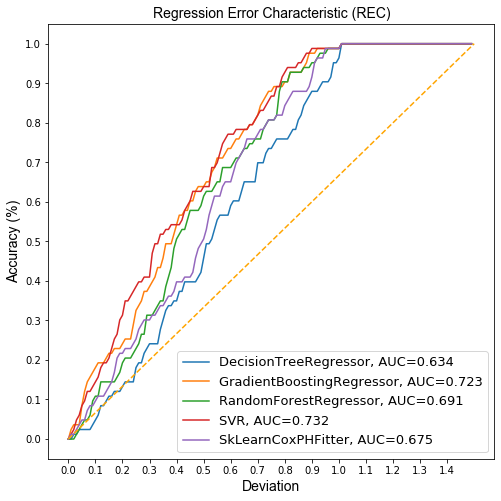

In [19]:
# Instantiate the classfiers and make a list
regressors = [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'),
              GradientBoostingRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=0.4, 
                                        max_features=9, max_depth=90, learning_rate=0.05), 
              RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), 
              SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
                    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
              cph]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'Deviation','Accuracy','AUC'])

# Train the models and record the results
for rls in regressors:
    model = rls.fit(X_important_train, y_train)
    y_pred = model.predict(X_important_val)    
    
    
    def REC(y_val , y_pred):
    
        # initilizing the lists
        Accuracy = []
    
        # initializing the values for Epsilon
        Begin_Range = 0
        End_Range = 1.5
        Interval_Size = 0.01
    
        # List of epsilons
        Epsilon = np.arange(Begin_Range , End_Range , Interval_Size)
        
        # Main Loops
        for i in range(len(Epsilon)):
            count = 0.0
            for j in range(len(y_val)):
                if np.linalg.norm(y_val[j] - y_pred[j]) / np.sqrt( np.linalg.norm(y_val[j]) **2 + np.linalg.norm(y_pred[j])**2 ) < Epsilon[i]:
                    count = count + 1
        
            Accuracy.append(count/len(y_val))
    
        # Calculating Area Under Curve using Simpson's rule
        AUC = simps(Accuracy , Epsilon ) / End_Range
        
        # returning epsilon , accuracy , area under curve    
        return Epsilon , Accuracy , AUC

    # finding the deviation and accuracy, and area under curve for plotting
    Deviation, Accuracy, AUC = REC(y_val, y_pred)

    # Calculating R^2 of the true and predicted values
    #RR = r2_score(y_val, y_predval)

    
    result_table = result_table.append({'regressors':rls.__class__.__name__,
                                        'Deviation':Deviation, 
                                        'Accuracy':Accuracy, 
                                        'AUC':AUC}, ignore_index=True)
    
# Set name of the classifiers as index labels
result_table.set_index('regressors', inplace=True)

fig = plt.figure(figsize=(8,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['Deviation'],
            result_table.loc[i]['Accuracy'],
            label="{}, AUC={:.3f}".format(i, result_table.loc[i]['AUC']))
    
        


plt.plot([0,1.5], [0,1], color='orange', linestyle='--')
plt.title("Regression Error Characteristic (REC)", fontdict=font)
#plt.plot(Deviation, Accuracy, "--b",lw =3)
plt.xticks(np.arange(0.0, 1.5, step=0.1))
plt.xlabel("Deviation", fontdict=font)
plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Accuracy (%)", fontdict=font)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\VALIDATION\RF\FLUX\AUC_FLUX.pdf', bbox_inches="tight")
plt.show()

In [20]:
# Instantiate the classfiers and make a list
regressors = [DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best'),
              GradientBoostingRegressor(n_estimators=100, min_samples_split=5, min_samples_leaf=0.4, 
                                        max_features=9, max_depth=90, learning_rate=0.05), 
              RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False), 
              SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
                    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
              cph]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'MAE','MSE','RMSE', 'rRMSE'])

# Train the models and record the results
for rls in regressors:
    model = rls.fit(X_important_train, y_train)
    y_pred = model.predict(X_important_val)  
    
    # Print result of MAE
          
    MAE = metrics.mean_absolute_error(y_val, y_pred)
    #print(metrics.mean_absolute_error(y_test, y_pred))

    # Print result of MSE
    MSE = metrics.mean_squared_error(y_val, y_pred)
    #print(metrics.mean_squared_error(y_test, y_pred))

    # Print result of RMSE
    RMSE = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
    #print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # Print result of RELATIVE ROOT MEAN SQUARED ERROR (RRMSE)
    def rmse_metric(y_val, y_pred):
        sum_error = 0.0
        for i in range(len(y_val)):
            prediction_error = y_pred[i] - y_val[i]
            sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(y_val))
        return sqrt(mean_error)

    rmse = rmse_metric(y_val, y_pred)

    def meanactual_metric(y_val):
        sum_error = 0.0
        for i in range(len(y_val)):
            prediction_error = y_val[i]
            sum_error += prediction_error
            mean_error = sum_error / float(len(y_val))
        return (mean_error)

    mean = meanactual_metric(y_val)
    rRMSE = rmse/mean

    
    result_table = result_table.append({'regressors':rls.__class__.__name__,
                                        'MAE':MAE, 
                                        'MSE':MSE, 
                                        'RMSE':RMSE,
                                        'rRMSE':rRMSE}, ignore_index=True)
print(result_table)

                  regressors        MAE          MSE       RMSE     rRMSE
0      DecisionTreeRegressor  29.993625  2078.075024  45.585908  1.588579
1  GradientBoostingRegressor  17.837293   577.075989  24.022406  0.837134
2      RandomForestRegressor  20.284892   709.220940  26.631202  0.928045
3                        SVR  16.480472   607.470317  24.646913  0.858896
4         SkLearnCoxPHFitter  25.136068   884.907911  29.747402  1.036638


In [21]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [22]:
kmf.fit(y_pred, z1_val)

c:\python\python37\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:262: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  self.confidence_interval_ = self._bounds(cumulative_sq_[:, None], alpha, ci_labels)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 83 total observations, 28 right-censored observations>

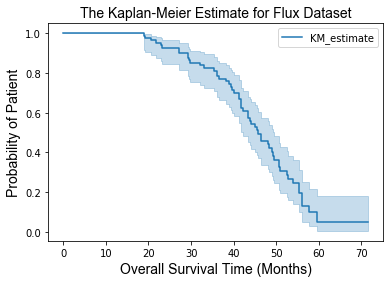

In [23]:
kmf.plot_survival_function()
plt.title("The Kaplan-Meier Estimate for Flux Dataset", fontdict=font)
plt.xlabel("Overall Survival Time (Months)", fontdict=font)
plt.ylabel("Probability of Patient", fontdict=font)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\VALIDATION\RF\FLUX\KM_FLUX.pdf', bbox_inches="tight")

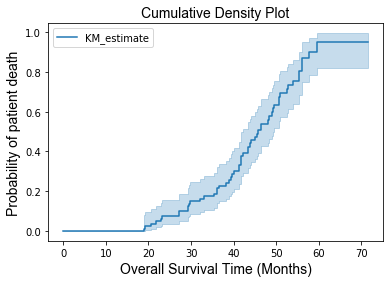

In [24]:
# Plot the cumulative density graph:

kmf.plot_cumulative_density()
plt.title("Cumulative Density Plot", fontdict=font)
plt.xlabel("Overall Survival Time (Months)", fontdict=font)
plt.ylabel("Probability of patient death", fontdict=font)
plt.savefig(r'C:\Users\U0033207PC\Desktop\GENE Enrichment\FINAL VISUALISATION\PLOTS\AUC_KM\VALIDATION\RF\FLUX\CUMULATIVEKM_FLUX.pdf', bbox_inches="tight")